# Intermediate Macroeconomics - Labour market effects

In this assignment, we consider the classical model of the labour market as we discussed in chapter 6 of the book.

We first import some libraries.

In [1]:
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

# The production function

In the first tutorial, exercise 2, you worked with the Cobb Douglas production function. In Python, this function can be written as:

In [2]:
def production_function(K,L,gamma):
    return A*K**gamma*L**(1-gamma)

However, in this assignment, we use a standard CES production function:

$$
Y = (\alpha K^\gamma + (1-\alpha) L^\gamma)^{1/\gamma}
$$

where $\gamma$ ≤1. When using this function, the substitution elasticity between capital and labour is equal to 1/(1-$\gamma$), so the higher $\gamma$ is, the more labour and capital can be substituted for each other.



** Exercise**

Define again the function `production_function(K,L,gamma)` but now for the CES case:


In [3]:
def production_function(K,L,gamma):
    return ((alpha*(K**gamma))+((1-alpha)*L**gamma))**(1/gamma)

From this production function we derive labour demand with parameter values $\alpha =0.25, \beta =0.1, K=1$.


In [4]:
alpha = 0.25
beta = 0.1
K = 1


def labour_demand(gamma,real_wage):
    labour =  optimize.fminbound(lambda l: -(production_function(K,l,gamma)-real_wage*l),0,100,full_output=1)
    return labour[0]



** Exercise** 

Give the Python code for the labour supply function as it was specified in the tutorial exercise:

In [5]:
def labour_supply(real_wage):
    return real_wage**beta

** Exercise**

Complete the code cell below to plot labour demand and labour supply as a function of the real wage $W/P$, assuming $\gamma$ has the value -10. Make sure that you specify $W/P$ as label on the y-axis and $L$ as label on the x-axis.



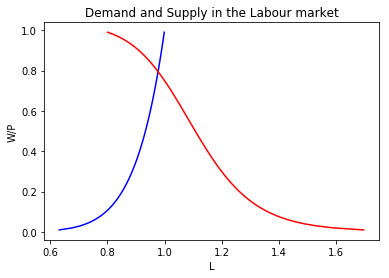

In [6]:
gamma = -10

range_realwage = arange(0.01,1.0,0.01)
range_demand = arange(0.01,100.0,0.01)
range_supply = arange(0.01,100.0,0.01)

plt.plot([labour_supply(real_wage) for real_wage in range_realwage], range_realwage, color='blue')
plt.plot([labour_demand(gamma,real_wage) for real_wage in range_realwage], range_realwage, color='red')
plt.xlabel("L")
plt.ylabel("W/P")
plt.title("Demand and Supply in the Labour market")
plt.show()

We can solve for the equilibrium value.



In [7]:
initial_guess = 0.8
realwage0=optimize.fsolve(lambda w: labour_demand(gamma,w)-labour_supply(w), initial_guess)
print(realwage0)

[0.79474529]


** Exercise **

Calculate the equilibrium values of labour $L$, real wage $W/P$ and output $Y$.

In [8]:
L0=labour_demand(gamma,realwage0) #L=0.9765
print(L0)
#Optimal real wage was calculated in the previous cell. (W/P)*=0.7947
Y0=production_function(K,L0,gamma) #Y
print(Y0)

[0.97728852]
[0.98245017]


# The AS-curve

Assume that the nominal wage $W$ is fixed at the level 2. We would like to plot the aggregate supply curve, that is: output $Y$ as a function of $P$.

In [9]:
W = 2

def labour_out_of_equilibrium(P,gamma):
    l = min(labour_demand(gamma,W/P), labour_supply(W/P))
    return l

In [10]:
Price = W/realwage0
print(Price)

[2.51652954]


---

**Exercise**

1.  Explain the code above.
2.  Plot output $Y$ as a function of $P$ (for values of P between 2 and 3).

---

1.
A nominal wage of two is imposed. The code above computes the lowest value between labour demand and labour supply for different price levels.
The eq. price (computed above) is 2.5165. When the price is higher real wage is lower and the supply of workers is lower than the demand. The function will then choose that value as the labour out of equilibrium. The opposite happens when the price is lower than 2.5165. 

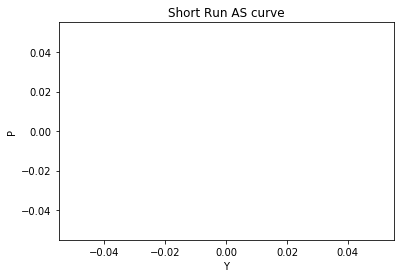

In [11]:
def labour_demand2(gamma,P):
    labour = optimize.fminbound(lambda l: -(production_function(K,l,gamma)-(W/P)*l),0,100,full_output=1)
    return labour[0]
def SRAS(gamma,P):
    Y = ((alpha*(K**gamma))+((1-alpha)*labour_demand2(gamma,P)**gamma))**(1/gamma)
    #return Y
range_price = arange(2.0,3.1,0.1)
plt.plot([SRAS(gamma,P) for P in range_price], range_price, color='yellow')
plt.show
plt.xlabel("Y")
plt.ylabel("P")
plt.title("Short Run AS curve")
#I could not get this one right. But I tried.

# Taxation

In this framework, we can introduce taxation as we also did in the tutorial exercise. With a social security tax $t_{worker}$, labour demand gets a different form.


** Exercise**

Adjust the code above by including a social security tax.

In [12]:
def labour_demand(gamma,real_wage):
    labour =  optimize.fminbound(lambda l: -(production_function(K,l,gamma)-(real_wage*(1+t_worker))*l),0,100,full_output=1)
    return labour[0]

---

**Exercise**

1.  Calculate the equilibrium employment and output levels for `t_worker = 0` and `t_worker = 0.2` at $\gamma = -10$.
2.  Do the same for $\gamma = -1$ and discuss the difference with the case of $\gamma = -10$, that is: by what percentage do the real wage, labour and production change due to the social security tax in both cases? What can explain this difference?

---


In [13]:
#equilibrium employment and output levels for t_worker = 0, at  γ=−10. Were already computed in the previous exercises.
#for t_worker = 0.2 at  γ=−10:
gamma=-10
t_worker=0.2
initial_guess = 0.8
realwage1 = optimize.fsolve(lambda w: labour_demand(gamma,w)-labour_supply(w), initial_guess)
print(realwage1)# realwage=0.68418096
L1=labour_demand(gamma,realwage1) #L=0.96275792
print(L1)
#Optimal real wage was calculated in the previous cell. (W/P)*=0.7947
Y1=production_function(K,L1,gamma) #Y=0.98245017
print(Y1)


[0.68418096]
[0.96275792]
[0.97070888]


In [14]:
#For t_worker = 0 at γ=−1:
t_worker = 0
gamma = -1
initial_guess = 0.8
realwage2 = optimize.fsolve(lambda w: labour_demand(gamma,w)-labour_supply(w), initial_guess)
print(realwage2)# realwage=0.76024348
L2=labour_demand(gamma,realwage2) #L=0.97296064
print(L2)
#Optimal real wage was calculated in the previous cell. (W/P)*=0.7947
Y2=production_function(K,L2,gamma) #Y=0.98286912
print(Y2)


[0.76024348]
[0.97296064]
[0.97958246]


In [15]:
#For t_worker = 0.2 at γ=−1:
t_worker = 0.2
gamma = -1
initial_guess = 0.8
realwage3 = optimize.fsolve(lambda w: labour_demand(gamma,w)-labour_supply(w), initial_guess)
print(realwage3)# realwage=0.76024348
L3=labour_demand(gamma,realwage3) #L=0.97296064
print(L3)
#Optimal real wage was calculated in the previous cell. (W/P)*=0.7947
Y3=production_function(K,L3,gamma) #Y=0.98286912
print(Y3)

[0.63891859]
[0.95619078]
[0.96677924]


In [16]:
#For γ=−10
changeL0=L1-L0
print(changeL0)
changeY0=Y1-Y0
print(changeY0)

#For γ=−1
changeL1=L3-L2
print(changeL1)
changeY1=Y3-Y2
print(changeY1)

#Comparing changes for γ=−10 and γ=−1
perchangeL=((changeL1-changeL0)/changeL0)*100
print(perchangeL)
perchangeY=((changeY1-changeY0)/changeY0)*100
print(perchangeY)


[-0.0145306]
[-0.01174129]
[-0.01676986]
[-0.01280322]
[15.4106124]
[9.04436431]


To put the impact of the social security tax into perspectiv:
Given that the substitution elasticity between capital and labour is equal to 0.09, the change of optiml labour is -0.0145 and -0.01174 for the equilibrium product, when the tax of 0.2 is imposed.
Given that the substitution elasticity between capital and labour is Infinite (1/1-(-1)), the change of optiml labour is -0.016769 and -0.0128 for the equilibrium product, when the tax of 0.2 is imposed.
The change that the substitution elasticity represents over the impact of adding the tax for optimal Labor in percentage change is 15.4106124.
The change that the substitution elasticity (from infinite to 0.09) represents over the impact of adding the tax for optimal Labor in percentage change is 15.4106124%.
The change that the substitution elasticity (from infinite to 0.09) represents over the impact of adding the tax for optimal output in percentage change is 9.04436431%.

Basically, when γ gets closer to -1 from -infinite, the substitution elasticity between labour and capital gets higher. Which means that a change in the price of labour (real wage), makes the demand of labour every time lower and the amount of capital higher. We set a capital of 1. So a higher elasticity makes the impact of the tax stronger in the labour market. 

-------

I had tons of fun and I learned a lot. Thank you.